In [ ]:
# Import Standard Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import ML Libaries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Import Dataset from sklearn 
from sklearn.datasets import load_iris

In [ ]:
# Load Iris Data
iris = load_iris()

## Preparing Iris Data

In [ ]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)

In [ ]:
iris_df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
target_df = pd.DataFrame(data= iris.target, columns= ['species'])

In [ ]:
def converter(specie):
    if specie == 0:
        return 'setosa'
    elif specie == 1:
        return 'versicolor'
    else:
        return 'virginica'

In [ ]:
target_df['species'] = target_df['species'].apply(converter)

In [ ]:
target_df

species
0       setosa
1       setosa
2       setosa
3       setosa
4       setosa
..         ...
145  virginica
146  virginica
147  virginica
148  virginica
149  virginica

[150 rows x 1 columns]

In [ ]:
iris_df = pd.concat([iris_df, target_df], axis= 1)

In [ ]:
iris_df

sepal length (cm)  sepal width (cm)  ...  petal width (cm)    species
0                  5.1               3.5  ...               0.2     setosa
1                  4.9               3.0  ...               0.2     setosa
2                  4.7               3.2  ...               0.2     setosa
3                  4.6               3.1  ...               0.2     setosa
4                  5.0               3.6  ...               0.2     setosa
..                 ...               ...  ...               ...        ...
145                6.7               3.0  ...               2.3  virginica
146                6.3               2.5  ...               1.9  virginica
147                6.5               3.0  ...               2.0  virginica
148                6.2               3.4  ...               2.3  virginica
149                5.9               3.0  ...               1.8  virginica

[150 rows x 5 columns]

## Overview of Iris Data

In [ ]:
iris_df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
count         150.000000        150.000000         150.000000        150.000000
mean            5.843333          3.057333           3.758000          1.199333
std             0.828066          0.435866           1.765298          0.762238
min             4.300000          2.000000           1.000000          0.100000
25%             5.100000          2.800000           1.600000          0.300000
50%             5.800000          3.000000           4.350000          1.300000
75%             6.400000          3.300000           5.100000          1.800000
max             7.900000          4.400000           6.900000          2.500000

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris_df.shape

(150, 5)

## Visualisation of Iris Data

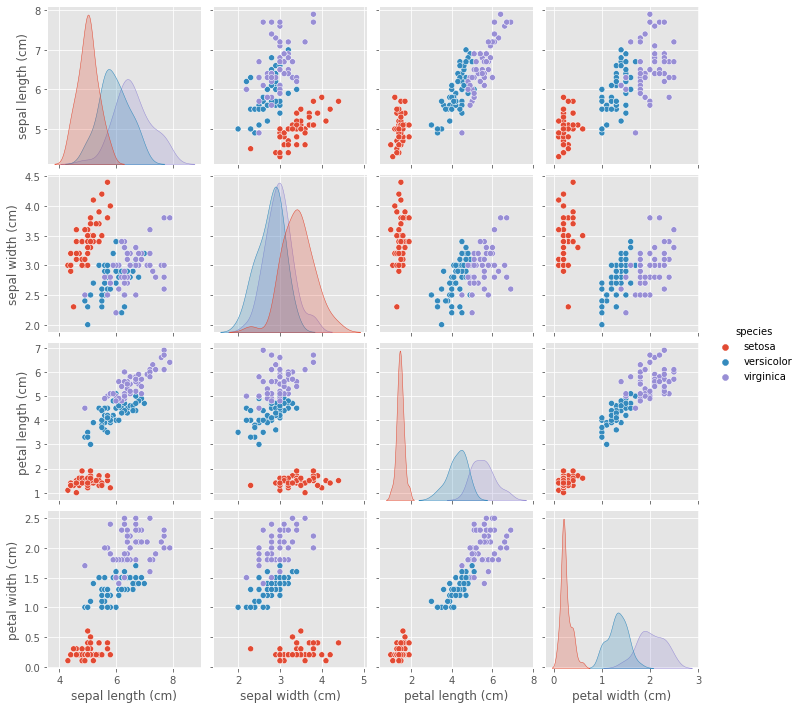

In [ ]:
plt.style.use('ggplot')
sns.pairplot(iris_df, hue= 'species')

In [ ]:
#sns_plot = sns.pairplot(iris_df, hue= 'species')
sns_plot.savefig("snspairplot iris.png")

NameError: ignored

## Problem: Predict sepal length (cm)

In [1]:
iris_df.drop('species', axis= 1, inplace= True)

NameError: ignored

In [3]:
target_df = pd.DataFrame(columns= ['species'], data= iris.target)

NameError: ignored

In [ ]:
iris_df = pd.concat([iris_df, target_df], axis= 1)

In [ ]:
# Variables 
X= iris_df.drop(labels= 'sepal length (cm)', axis= 1)
y= iris_df['sepal length (cm)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 101)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
# Instantiating LinearRegression() Model
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
lr.predict(X_test)

In [ ]:
pred = lr.predict(X_test)

In [ ]:
# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

## Testing

In [ ]:
iris_df.loc[6]

In [ ]:
d = {'sepal length (cm)' : [4.6],
    'sepal width (cm)' : [3.4],
    'petal length (cm)' : [1.4],
    'petal width (cm)' : [0.3],
    'species' : 0}

In [ ]:
test_df = pd.DataFrame(data= d)

In [ ]:
test_df

In [ ]:
X_test = test_df.drop('sepal length (cm)', axis= 1)
y_test = test_df['sepal length (cm)']

In [ ]:
lr.predict(X_test)

In [ ]:
pred = lr.predict(X_test)

In [ ]:
print('Predicted Sepal Length (cm):', pred[0])
print('Actual Sepal Length (cm):', 4.6)

## END